### 6.2 Exercise: Titanic Case Study Part 1
Complete the Titanic Case Study Part 1 tutorial. This will be a complete analysis case study but Part 1 is the graph analysis. 
- I have provided sample code for you to use as you go through the tutorial. 
- I recommend that you comment out the steps and run them separately so you can fully understand what you are doing for each step of the analysis. 
- As you go through each step, show visually that you have successfully completed each step in your notebook or paste images into a document.

In [44]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick as yb
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates

#### Step 1:  Load data into a dataframe

In [4]:
# Import the csv file (already in the same directory as the notebook)
data = pd.read_csv('train.csv')

#### Steps 2 & 3: Look at the data and check the shape

In [5]:
# See how the data looks
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check the shape of the data
data.shape

(891, 12)

In [7]:
# What are the data types of each column
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Step 5: What type of variables are in the table 

In [8]:
# Look at the statistics for each column
print('Describe the Data: ')
print(data.describe())

Describe the Data: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Look at the summaries of the data
print('Summarize the Data:')
print(data.describe(include = ['O']))

Summarize the Data:
                      Name   Sex Ticket    Cabin Embarked
count                  891   891    891      204      889
unique                 891     2    681      147        3
top     Markoff, Mr. Marin  male   1601  B96 B98        S
freq                     1   577      7        4      644


#### Step 6: Histograms

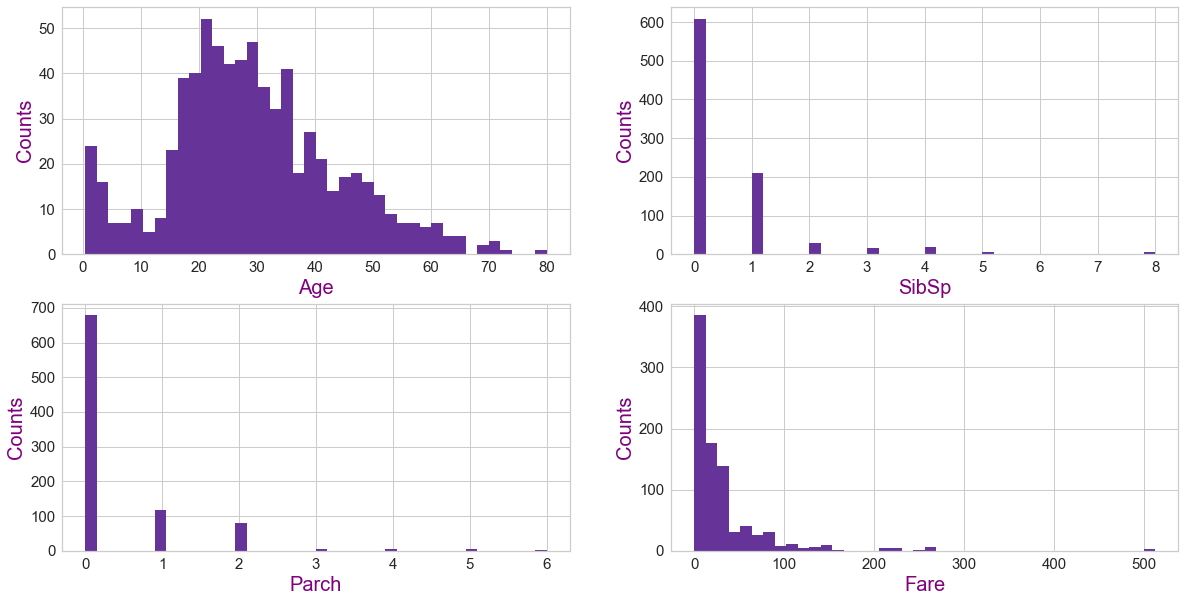

In [17]:
# Set up the paramenters and make the histograms
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), 
            bins = 40, 
            color = 'rebeccapurple')
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20,
                  color = 'purple')
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20,
                  color = 'purple')
    ax.tick_params(axis='both', 
                   labelsize = 15,
                   color = 'purple')
plt.show()

#### Step 7: Bar Charts

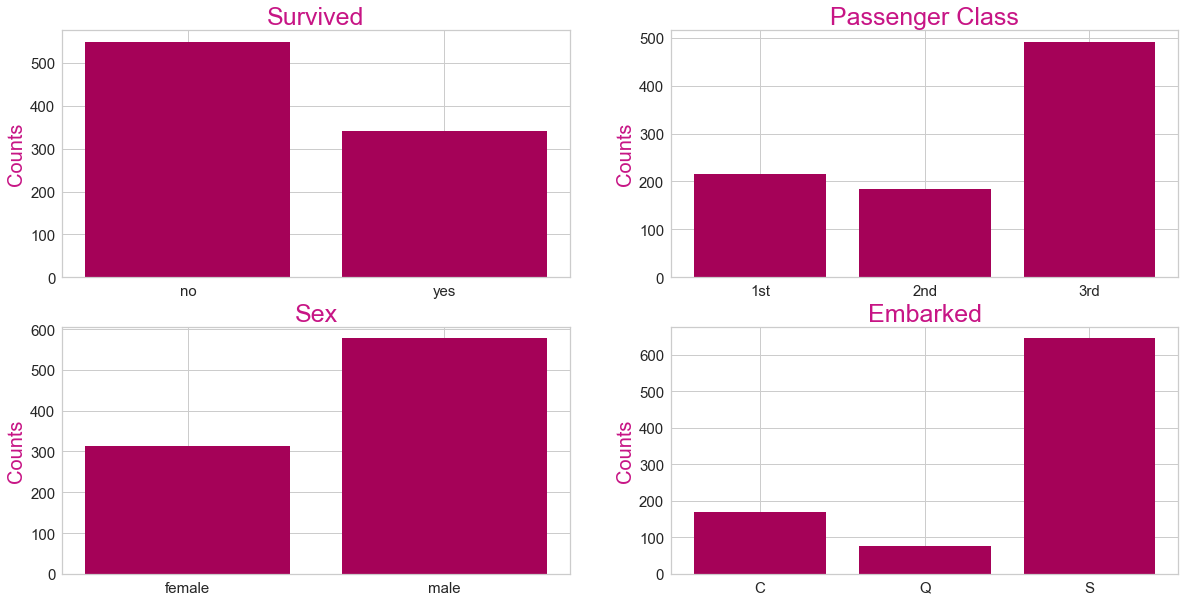

In [27]:
# Set up the paramenters and make the bar charts
plt.rcParams['figure.figsize'] = (20, 10)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Survivors
# Make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name = 'Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name ='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived, 
               color = 'm')
axes[0, 0].set_title('Survived', 
                     fontsize = 25,
                     color = 'mediumvioletred')
axes[0, 0].set_ylabel('Counts', 
                      fontsize = 20,
                      color = 'mediumvioletred')
axes[0, 0].tick_params(axis='both', 
                       labelsize = 15,
                       color = 'mediumvioletred')

# Passenger Class
# Make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# Draw the bar chart
axes[0, 1].bar(X_Pclass, Y_Pclass,
              color = 'm')
axes[0, 1].set_title('Passenger Class', 
                     fontsize = 25, 
                     color = 'mediumvioletred')
axes[0, 1].set_ylabel('Counts', 
                      fontsize = 20, 
                      color = 'mediumvioletred')
axes[0, 1].tick_params(axis = 'both', 
                       labelsize = 15, 
                       color = 'mediumvioletred')

# Sex
# Make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name = 'Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name = 'Counts')['Counts']
# Draw the bar chart
axes[1, 0].bar(X_Sex, Y_Sex,
               color = 'm')
axes[1, 0].set_title('Sex', 
                     fontsize = 25, 
                     color = 'mediumvioletred')
axes[1, 0].set_ylabel('Counts', 
                      fontsize = 20, 
                      color = 'mediumvioletred')
axes[1, 0].tick_params(axis='both', 
                       labelsize = 15, 
                       color = 'mediumvioletred')

# Embarked
# Make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Counts']
# Draw the bar chart
axes[1, 1].bar(X_Embarked, Y_Embarked, 
               color = 'm')
axes[1, 1].set_title('Embarked', 
                     fontsize = 25, 
                     color = 'mediumvioletred')
axes[1, 1].set_ylabel('Counts', 
                      fontsize = 20, 
                      color = 'mediumvioletred')
axes[1, 1].tick_params(axis = 'both', 
                       labelsize = 15, 
                       color = 'mediumvioletred')
plt.show()


#### Step 8: Pearson Ranking

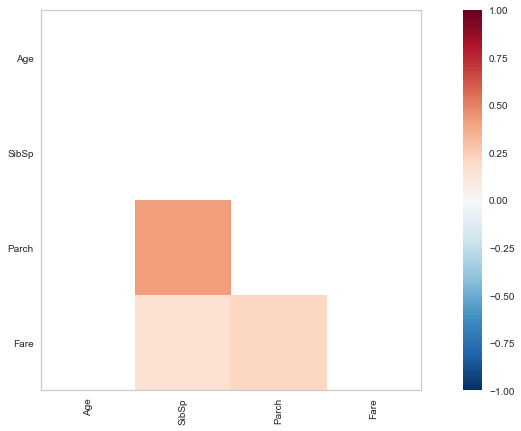

In [46]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# extract the numpy arrays from the data frame
X = data[num_features].to_numpy()


# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features = num_features, 
                    algorithm = 'pearson')

# Fit the data to the visualizer and transform it
visualizer.fit(X)                
visualizer.transform(X)            

# Show the data
plt.show()


#### Step 9:  Compare variables against Survived and Not Survived

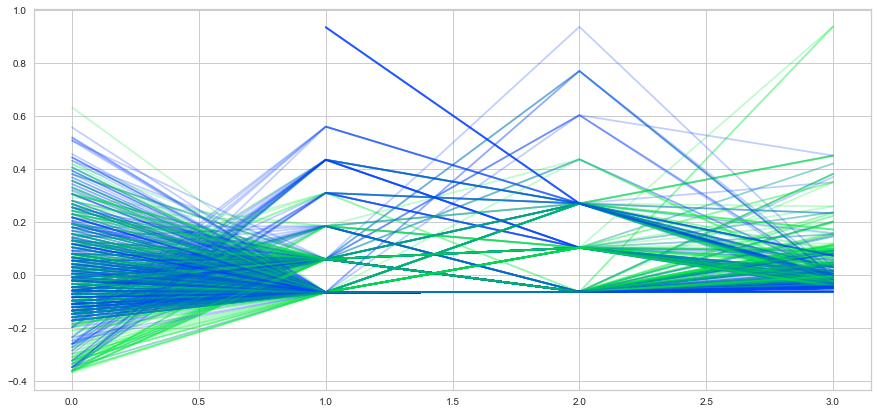

In [40]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# Choose the color palette
set_palette('sns_bright')

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Copy the data into a new dataframe
data_norm = data.copy()

# Normalize the data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna = True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = data.Survived.to_numpy()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features = num_features)

# Fit the data to the visualizer and transform it
visualizer.fit(X, y)      
visualizer.transform(X)   

# Show the data
plt.show();


#### Step 10 - stacked bar charts to compare survived/not survived

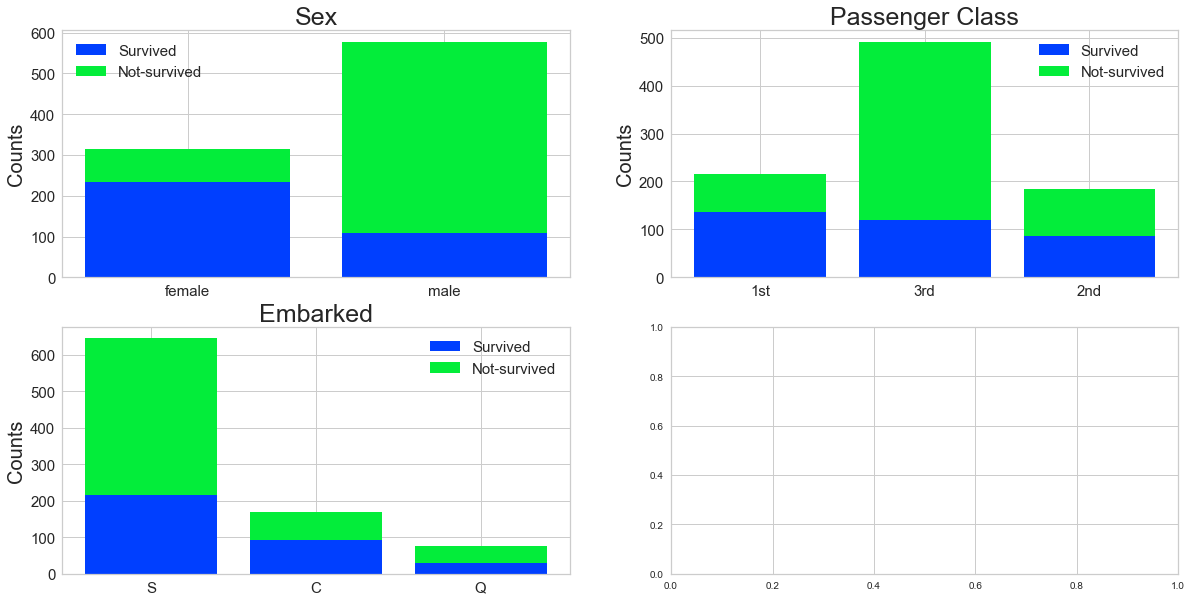

In [50]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Sexes - Survived vs. not survived
# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# Make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom = Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize = 25)
axes[0, 0].set_ylabel('Counts', fontsize = 20)
axes[0, 0].tick_params(axis = 'both', labelsize = 15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Passenger Class - survived vs. not survived
# Make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# Make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom = Pclass_survived.values)
axes[0, 1].set_title('Passenger Class', fontsize = 25)
axes[0, 1].set_ylabel('Counts', fontsize = 20)
axes[0, 1].tick_params(axis = 'both', labelsize = 15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Embarked - survived vs. not survived
# Make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived'] == 0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# Make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Show the pot
plt.show()